In [125]:
from func_def import *
df = pd.read_csv('data_features_ready.csv',index_col=[0]).reset_index(drop=True)
df.tail(3)

,date,result,fighter,opponent,title,method,round,time,format,str_succ_mean_dif,head_str_succ_mean_dif,body_str_succ_mean_dif,clinch_str_att_mean_dif,ground_str_perc_mean_dif,win_perc_mean_dif,head_str_att_mean_dif,clinch_str_succ_mean_dif,dist_str_perc_mean_dif,head_str_perc_mean_dif,distance_str_succ_mean_dif,ground_str_succ_mean_dif,body_str_att_mean_dif,distance_str_att_mean_dif,leg_str_att_mean_dif,str_att_mean_dif,clinch_str_perc_mean_dif,ground_str_att_mean_dif,body_str_perc_mean_dif,leg_str_succ_mean_dif,leg_str_perc_mean_dif,current_lose_streak_dif,current_win_streak_dif
7259,2020-02-29 00:00:00,L,TJ Brown,Jordan Griffin,Featherweight Bout,Submission,2,3:38,3 Rnd (5-5-5),-46.5,-42.500000,-4.000000,-2.000000,-0.25,0.0,-92.000000,-2.000000,-0.705000,-0.920000,-31.500000,-13.000000,-5.0,-73.000000,0.0,-97.000000,-0.035,-22.000000,-0.07,0.000000,0.00,-2,0
7260,2020-02-29 00:00:00,W,Spike Carlyle,Aalon Cru,Featherweight Bout,KO/TKO,1,1:25,3 Rnd (5-5-5),0.0,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.00,0.000000,0.00,0,0
7261,2020-02-29 00:00:00,L,Ismail Naurdiev,Sean Brad,Welterweight Bout,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),-68.0,-58.666667,4.333333,-0.333333,0.15,0.0,-110.333333,1.333333,-0.273333,-0.173333,-78.666667,9.333333,4.0,-131.333333,-13.0,-119.333333,0.120,12.333333,0.21,-13.666667,-0.03,3,-1


In [126]:
y = 'result'
X = ['str_succ_mean_dif']
#X = [feature for feature in df.columns if '_dif' in feature]
INCLUDE_OUTLIERS = True

#df = df[(df.result=='W')|(df.result=='L')].reset_index(drop=True)
df = df[['date','fighter','opponent','title','method','format'] + X + [y]]
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0)
df.head(5)

Data split: Data=(7262, 9), train_set=(5075, 9), validation_set=(0, 9), test_set=(2187, 9)


,set,date,fighter,opponent,title,method,format,str_succ_mean_dif,result
0,train,2023-10-07,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,5 Rnd (5-5-5-5-5),-37.151515,L
1,test,2023-10-07,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,3 Rnd (5-5-5),-10.000000,W
2,train,2023-10-07,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3 Rnd (5-5-5),23.733333,L
3,test,2023-10-07,Drew Dobe,Ricky Glenn,Lightweight Bout,KO/TKO,3 Rnd (5-5-5),-10.698413,W
4,train,2023-10-07,Bill Algeo,Alexander Hernandez,Featherweight Bout,Decision - Unanimous,3 Rnd (5-5-5),26.077922,W


In [127]:
# Remove outliers
df['outlier'] = False

for feature in X:
    mean = np.mean(df[feature])
    std = np.std(df[feature])
    df.loc[(df[feature] > mean + 3*std)|(df[feature] < mean - 3*std),'outlier'] = True

print(f'1d Outliers Detected: {df.outlier.value_counts().to_dict()}')    

if INCLUDE_OUTLIERS:
    df = df[df.outlier == False].reset_index(drop=True)

1d Outliers Detected: {False: 7193, True: 69}


In [128]:
print('Pre-Training Report:\n---------------------')
print(f"Train records: {len(df[df.set=='train'])}")
print('Train records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'train')])))
print('Train records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'train')])))
print('-----------------------------------')
print('Validation records: %d' %len(df[df.set=='validation']))
print('Validation records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'validation')])))
print('Validation records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'validation')])))
print('-----------------------------------')
print('Test records: %d' %len(df[df.set=='test']))
print('Test records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'test')])))
print('Test records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'test')])))


Pre-Training Report:
---------------------
Train records: 5022
Train records of df.result==L : 2441
Train records of df.result==W : 2480
-----------------------------------
Validation records: 0
Validation records of df.result==L : 0
Validation records of df.result==W : 0
-----------------------------------
Test records: 2171
Test records of df.result==L : 1065
Test records of df.result==W : 1076


In [129]:
# Train logistic regression model
X_train = df[df['set'] == 'train'][X]
y_train = np.ravel(np.array(df[df['set'] == 'train'][y]).reshape(-1,1))

log_reg = LogisticRegression(max_iter=1000,penalty='l2',solver='lbfgs',C=0.1)
log_reg.fit(X=X_train,y=y_train)
log_reg

LogisticRegression(C=0.1, max_iter=1000)

In [130]:
# Evaluate performance
X_test = df[df['set'] == 'test'][X]
y_test = df[df['set']=='test'][y]
df[f'{y}_prediction'] = log_reg.predict(df[X])
df[f'{y}_pred_proba'] = [max(item) for item in log_reg.predict_proba(df[X])]
df.head(5)

,set,date,fighter,opponent,title,method,format,str_succ_mean_dif,result,outlier,result_prediction,result_pred_proba
0,train,2023-10-07,Grant Dawson,Bobby Green,Lightweight Bout,KO/TKO,5 Rnd (5-5-5-5-5),-37.151515,L,False,L,0.562489
1,test,2023-10-07,Joe Pyfer,Abdul Razak Alhassa,Middleweight Bout,Submission,3 Rnd (5-5-5),-10.000000,W,False,L,0.506385
2,train,2023-10-07,Alex Morono,Joaquin Buckley,Welterweight Bout,Decision - Unanimous,3 Rnd (5-5-5),23.733333,L,False,W,0.544074
3,test,2023-10-07,Drew Dobe,Ricky Glenn,Lightweight Bout,KO/TKO,3 Rnd (5-5-5),-10.698413,W,False,L,0.507840
4,train,2023-10-07,Bill Algeo,Alexander Hernandez,Featherweight Bout,Decision - Unanimous,3 Rnd (5-5-5),26.077922,W,False,W,0.548961


Model Performance:
    Accuracy = 0.5352449223416965
    "W" Accuracy = 0.6129032258064516
    "L" Accuracy = 0.4784924211388775


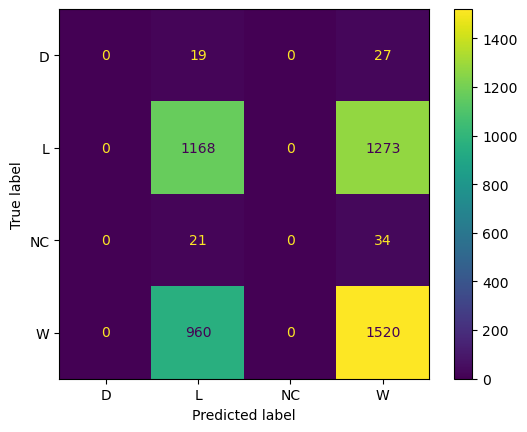

In [131]:
DATA_SET = 'train'

CORRECT_PREDICTIONS = len(df[(df.set == DATA_SET)&(df.result_prediction == df.result)])
W_CORRECT_PREDICTIONS = len(df[(df.set == DATA_SET)&(df.result_prediction == df.result)&(df.result=='W')])
L_CORRECT_PREDICTIONS = len(df[(df.set == DATA_SET)&(df.result_prediction == df.result)&(df.result=='L')])
ALL_INCLUDED_DATA = len(df[df.set == DATA_SET])
ALL_W_RESULTS = len(df[(df.set == DATA_SET)&(df.result=='W')])
ALL_L_RESULTS = len(df[(df.set == DATA_SET)&(df.result=='L')])
cm = confusion_matrix(y_true=df.loc[df.set==DATA_SET,y],y_pred=df.loc[df.set==DATA_SET,f'{y}_prediction'])

print('Model Performance:')
print(f'    Accuracy = {CORRECT_PREDICTIONS/ALL_INCLUDED_DATA}')
print(f'    "W" Accuracy = {W_CORRECT_PREDICTIONS/ALL_W_RESULTS}')
print(f'    "L" Accuracy = {L_CORRECT_PREDICTIONS/ALL_L_RESULTS}')
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_).plot()


Model Performance:
    Accuracy = 0.5499769691386458
    "W" Accuracy = 0.612453531598513
    "L" Accuracy = 0.5023474178403756


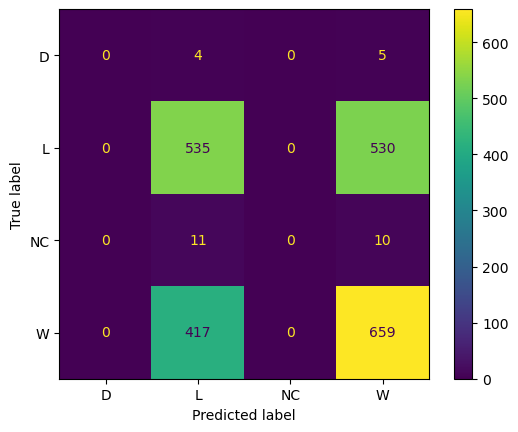

In [132]:
DATA_SET = 'test'

CORRECT_PREDICTIONS = len(df[(df.set == DATA_SET)&(df.result_prediction == df.result)])
W_CORRECT_PREDICTIONS = len(df[(df.set == DATA_SET)&(df.result_prediction == df.result)&(df.result=='W')])
L_CORRECT_PREDICTIONS = len(df[(df.set == DATA_SET)&(df.result_prediction == df.result)&(df.result=='L')])
ALL_INCLUDED_DATA = len(df[df.set == DATA_SET])
ALL_W_RESULTS = len(df[(df.set == DATA_SET)&(df.result=='W')])
ALL_L_RESULTS = len(df[(df.set == DATA_SET)&(df.result=='L')])
cm = confusion_matrix(y_true=df.loc[df.set==DATA_SET,y],y_pred=df.loc[df.set==DATA_SET,f'{y}_prediction'])

print('Model Performance:')
print(f'    Accuracy = {CORRECT_PREDICTIONS/ALL_INCLUDED_DATA}')
print(f'    "W" Accuracy = {W_CORRECT_PREDICTIONS/ALL_W_RESULTS}')
print(f'    "L" Accuracy = {L_CORRECT_PREDICTIONS/ALL_L_RESULTS}')
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_).plot()


In [133]:
df[df.set=='test'].result_prediction.value_counts()

W    1204
L     967
Name: result_prediction, dtype: int64

In [134]:
df[df.set=='test'].result.value_counts()

W     1076
L     1065
NC      21
D        9
Name: result, dtype: int64